In [360]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
nltk.data.path.append("C:/Users/kapta/AppData/Roaming/nltk_data")
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix


In [361]:
df = pd.read_csv("./sms-spam(in)_used.csv")
print(df.head)  

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

In [362]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
531,ham,What Today-sunday..sunday is holiday..so no wo...,NaN,NaN,NaN
5192,ham,Oh oh... Den muz change plan liao... Go back h...,NaN,NaN,NaN
3188,ham,X2 &lt;#&gt; . Are you going to get that,NaN,NaN,NaN
3133,ham,Ok going to sleep. Hope i can meet her.,NaN,NaN,NaN
1086,ham,I don't think he has spatula hands!,NaN,NaN,NaN


In [363]:
df.columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True) #prepersistant step 1, deleting unneeded columns
df.columns

Index(['v1', 'v2'], dtype='object')

In [364]:
df.rename(columns={'v1':'result','v2':'input'},inplace=True) #renameing columns, inplace=True makes it so the variable df is changed and not a new table is made
print(df.head())

  result                                              input
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [365]:
df['result'].value_counts()#df['column'] displays that column alone, value_count displays the count of each value in the column
df.isnull().sum() #sum of any null values thats there

result    0
input     0
dtype: int64

In [366]:
df.duplicated().sum() #shows sum of all duplicate values

np.int64(403)

In [367]:
df = df.drop_duplicates() #removes duplicate values
df.duplicated().sum() #to confirm duplicates have been taken out
df.shape #to show (rows,columns)

(5169, 2)

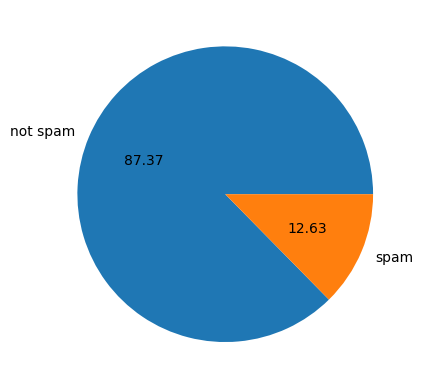

In [368]:
import matplotlib.pyplot as plt
plt.pie(df['result'].value_counts(),labels=['not spam','spam'],autopct = '%0.2f')
plt.show()

In [369]:
nltk.download('punkt', force=True)  # Forces redownload


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kapta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [370]:
df = df.replace({'ham':0,'spam':1}) #putting spam as 1 and ham as 0
print(df.head())

   result                                              input
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


C:\Users\kapta\AppData\Local\Temp\ipykernel_12860\3415239392.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'ham':0,'spam':1}) #putting spam as 1 and ham as 0


In [371]:
#removing stop words and special characters that will not be useful in telling if something is spam or not by downloading all the stopwords
nltk.download('stopwords', force=True)  # Forces redownload
nltk.download('punkt_tab', force=True)  # Forces redownload


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kapta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kapta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [372]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import PorterStemmer

# Get the stopwords from NLTK
stop_words = stopwords.words("english")  # Rename variable to avoid conflict

def transform_text(text):  # Function to process text
    # Convert to lower case
    text = text.lower()
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove special characters (non-alphanumeric characters)
    words = [word for word in words if word.isalnum()]
    
    # Remove stop words and punctuation
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    
    # Apply stemming to the words
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in words]
    
    # Join the processed words back into a string
    return " ".join(stemmed_words)

df['countCharacters'] = df['input'].apply(len)

<Axes: xlabel='countCharacters', ylabel='Count'>

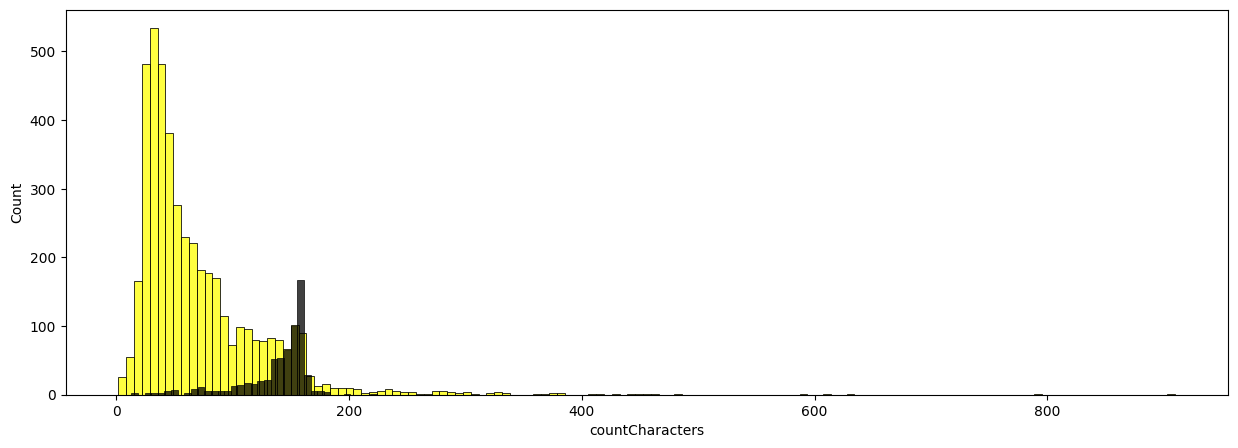

In [373]:
#for better visualization, we will plot a histogram using 'seaborn'
plt.figure(figsize = (15, 5))
sns.histplot(df[df['result'] == 0]['countCharacters'], color = "yellow")
sns.histplot(df[df['result'] == 1]['countCharacters'], color = "black")

#black = SPAM
#yellow = not SPAM

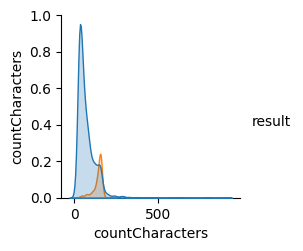

In [374]:
#finding relationship between the columns
sns.pairplot(df, hue='result')

In [375]:
df['processed'] = df['input'].apply(transform_text)
df.head

<bound method NDFrame.head of       result                                              input  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      countCharacters                                          processed  
0                 111  go jurong point crazi avail bugi n great world...  
1              

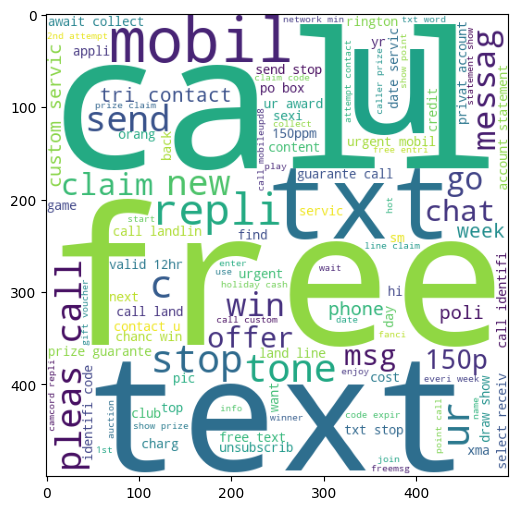

In [376]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
#creating a wordcloud for the SPAM messages
spamWC = wc.generate(df[df['result'] == 1]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)


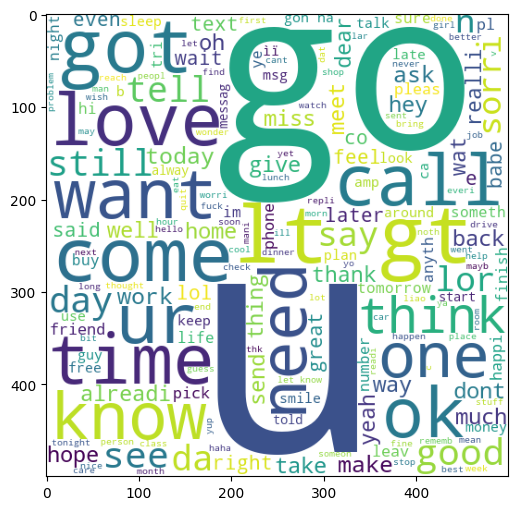

In [377]:
#creating a wordcloud for the not SPAM messages
spamWC = wc.generate(df[df['result'] == 0]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)


In [378]:
#extracting all the words used in SPAM messages
spamWords = list()

for msg in df[df['result'] == 1]['processed'].tolist():
  for word in msg.split():
    spamWords.append(word)

spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [379]:
#to count the frequency of the words, we will be using the Counter class to create a dictionary
spamWordsDictionary = Counter(spamWords)

#to extract the most common words
spamWordsDictionary.most_common(40)


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

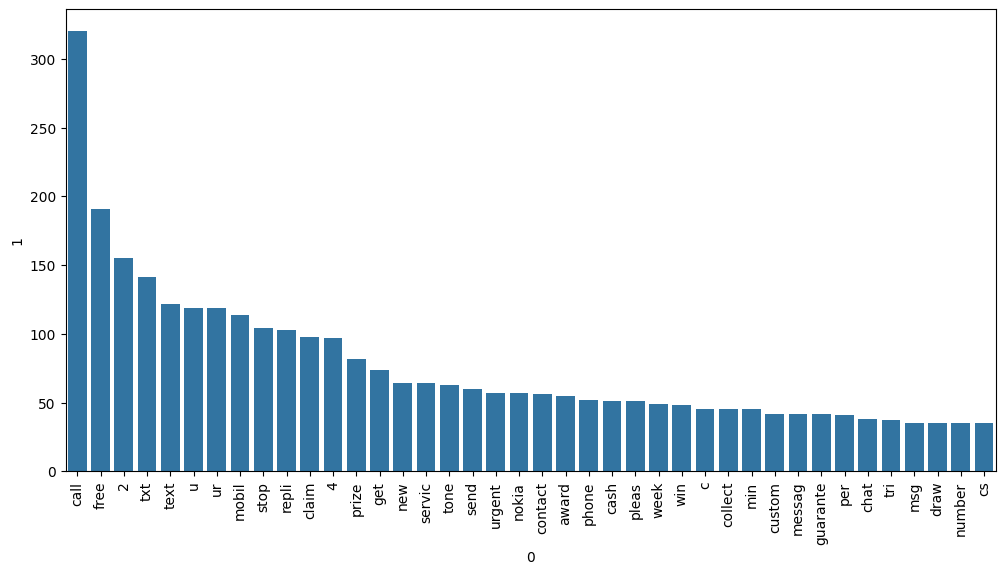

In [380]:
#converting this dictionary to a dataframe
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

#plotting a bar plot of the mostCommonSPAM dataframe
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()


In [381]:
#MODEL BUILDING

#converting the collection of text into a matrix of token counts
cv = CountVectorizer()

#transforming the data of processed column
X = cv.fit_transform(df['processed']).toarray()

#printing size of X
X.shape


(5169, 6708)

In [382]:
y = df['result'].values
y 

array([0, 0, 1, ..., 0, 0, 0])

In [383]:
#splitting the training and testing dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49) #X,y -> inputs, 20% is test data while 80% is training data

#creating the objects for the models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [384]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8617021276595744
[[774 125]
 [ 18 117]]
0.4834710743801653


In [385]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


0.9700193423597679
[[882  17]
 [ 14 121]]
0.8768115942028986


In [386]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [387]:
#We have to care about precision mainly which is the highest with Bernoulli naive bayes

#using 'TfidfVectorizer' for vectorization 
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(df['processed']).toarray()

#storing the values of the 'result' column
y = df['result'].values

#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)
 


In [388]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8597678916827853
[[775 124]
 [ 21 114]]
0.4789915966386555


In [389]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


0.9574468085106383
[[899   0]
 [ 44  91]]
1.0


In [390]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [391]:
#we will pickle 2 files
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
